# What to do
chapter 4 of the fish book

# Loss functions

## Mean squared error

In [1]:
import numpy as np

In [2]:
def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)

In [3]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [4]:
y1 = [0.1, 0.05, 0.6, 0.0, 0.0, 0.1, 0.0, 0.1, 0.0, 0.0]

In [5]:
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

In [6]:
mean_squared_error(np.array(y1), np.array(t))

0.09625000000000003

In [7]:
mean_squared_error(np.array(y2), np.array(t))

0.59750000000000003

### Cross Entropy Error

In [8]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y + delta))

In [9]:
cross_entropy_error(np.array(y1), np.array(t))

0.51082545709933802

In [10]:
cross_entropy_error(np.array(y2), np.array(t))

2.3025840929945458

### Mini batch

In [11]:
%run mnist.py

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [12]:
(x_train, t_train), (x_test, y_test) = load_mnist(normalize=True, one_hot_label=True)

In [13]:
x_train.shape

(60000, 784)

In [14]:
t_train.shape

(60000, 10)

In [15]:
train_size = x_train.shape[0]

In [16]:
batch_size = 10

In [17]:
batch_mask = np.random.choice(train_size, batch_size)

In [18]:
x_batch = x_train[batch_mask]

In [19]:
t_batch = t_train[batch_mask]

In [20]:
np.random.choice(60000, 10)

array([  228, 49242, 27663, 37412, 31712, 50080, 59639, 52714, 21208,  3828])

### Mini batch cross entropy

- one hot

In [21]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
       
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/batch_size

- in the case of labels

In [22]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
       
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7))/batch_size

# Numerical Differentiation

In [23]:
# Bad one 
def numerical_diff(f, x):
    h = 10e-50 # too small
    return(f(x+h)-f(x))/h #one sided

In [24]:
def x_3(x):
    return x**3

In [25]:
numerical_diff(x_3, 1)

0.0

In [26]:
# Better
def numerical_diff(f, x):
    h = 1e-4 #0.0001
    return (f(x+h)-f(x-h))/(2*h)

In [27]:
numerical_diff(x_3, 1)

3.0000000099994484

In [28]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

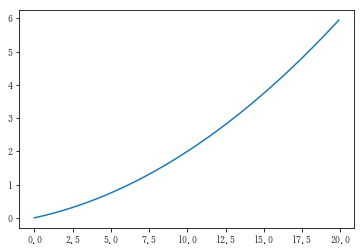

In [30]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.plot(x,y)

In [31]:
numerical_diff(function_1, 5)

0.1999999999990898

In [32]:
numerical_diff(function_1, 10)

0.2999999999986347

In [33]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

In [34]:
tf = tangent_line(function_1, 5)
y2 = tf(x)

0.1999999999990898


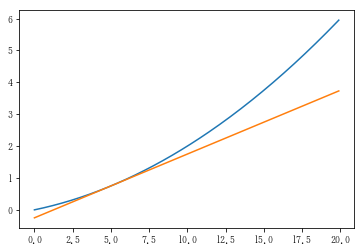

In [35]:
plt.plot(x,y)
plt.plot(x, y2)

## Partial Differntial

In [36]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [37]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

In [38]:
fig = plt.figure()

In [39]:
ax = fig.gca(projection = '3d')

In [40]:
x0 = np.arange(-3,3,0.1)

In [41]:
X, Y = np.meshgrid(x0, x0)

In [42]:
surf = ax.plot_surface(X, Y, function_2([X,Y]), linewidth = 0, cmap = 'bwr')

In [43]:
fig.colorbar(surf)

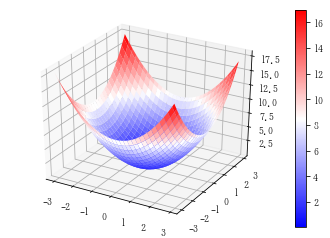

In [44]:
fig

In [45]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [46]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [47]:
def function_tmp2(x1):
    return x1*x1 + 3.0**2.0

In [48]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

## gradients

In [49]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)の計算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        # f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1-fxh2)/(2*h)
        x[idx] = tmp_val
       
    return grad

In [50]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([ 6.,  8.])

In [51]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([ 0.,  4.])

In [52]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([ 6.,  0.])

In [53]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        
    return grad

In [54]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

In [55]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

In [56]:
def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

C:\Users\shota.shimizu\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


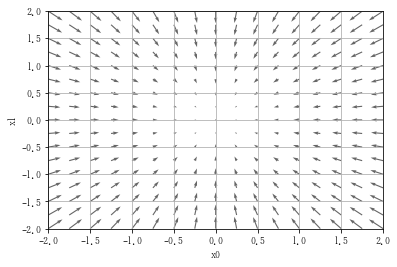

In [57]:

x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]) )

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()

## Gradient descent

In [60]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr *grad
    
    return x

In [61]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num = 100)

array([ -6.11110793e-10,   8.14814391e-10])

In [67]:

gradient_descent(function_2, init_x = init_x, lr = 10, step_num = 100)

array([  2.34235971e+12,  -3.96091057e+12])

In [68]:
gradient_descent(function_2, init_x = init_x, lr = 1e-8, step_num = 100)

array([  2.34235971e+12,  -3.96091057e+12])

## Gradients in neural networks

### Simple nets

In [84]:
%run functions.py
%run gradient.py

In [72]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [73]:
net = simpleNet()

In [74]:
net.W

array([[-0.69892688,  0.88726207, -0.58091732],
       [-0.03068002,  1.52573128,  2.3844829 ]])

In [75]:
x = np.array([0.6, 0.9])

In [76]:
p = net.predict(x)

In [77]:
p

array([-0.44696815,  1.9055154 ,  1.79748422])

In [78]:
np.argmax(p)

1

In [79]:
t = np.array([0, 0, 1])

In [80]:
net.loss(x, t)

0.79753762368812142

### gradients

In [81]:
def f(W):
    return net.loss(x, t)

In [82]:
dW = numerical_gradient(f, net.W)

In [83]:
dW

array([[ 0.02864386,  0.30109408, -0.32973794],
       [ 0.04296579,  0.45164112, -0.49460691]])

## Learning Algorithms